# (1) Data Preparation

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve
import seaborn as sns
from sklearn.svm import SVC


### Reading input data from CSV file

In [2]:
df = pd.read_csv('hd.csv')
print(df.tail())

     patient id  age  sex  chest pain type  resting bp s  cholesterol  \
995         996   61    1                4           120          260   
996         997   39    1                4           118          219   
997         998   61    0                4           145          307   
998         999   56    1                4           125          249   
999        1000   52    1                1           118          186   

     fasting blood sugar  resting ecg  max heart rate  exercise angina  \
995                    0            0             140                1   
996                    0            0             140                0   
997                    0            2             146                1   
998                    1            2             144                1   
999                    0            2             190                0   

     oldpeak  ST slope  heart disease  
995      3.6         2              1  
996      1.2         2              

Check for null values

In [5]:
print(X.isnull().sum())
print("y: ", y.isnull().sum())

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
dtype: int64
y:  0


### Dividing dataset into X and Y

In [4]:
X = df.drop(columns=['heart disease', 'patient id'])
# Represents the result of the prediction based on input variables
y = df['heart disease']

# (2) Data Analysis and Visualization

### Visualizing the class balance in our dataset

heart disease
1    540
0    460
Name: count, dtype: int64


<ipython-input-6-146a45ff3ce7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[1, 0], y=[percent_y, percent_n], alpha=0.8, palette="coolwarm")


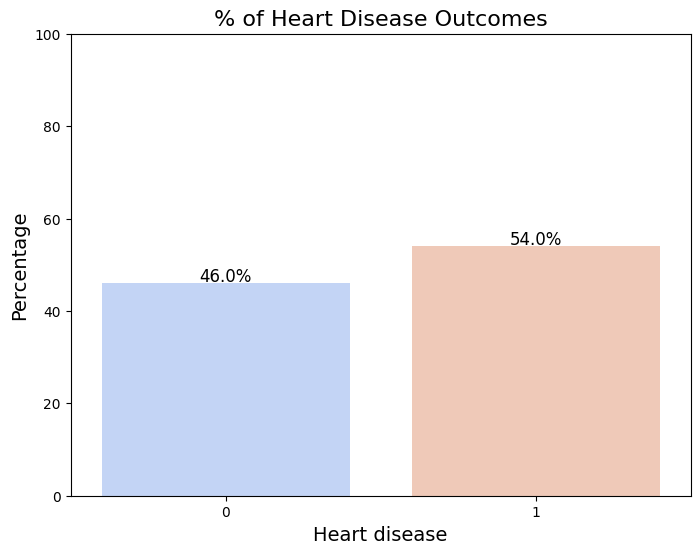

In [6]:
# Counting nb of heart disease
hd_counts = y.value_counts()
print(hd_counts)

# Calculating % of heart disease cases from dataset
total_samples = len(y)
percent_y = ( hd_counts[1] / total_samples) * 100
percent_n = (hd_counts[0] / total_samples) * 100

fig, ax = plt.subplots(figsize=(8, 6))

# Using Seaborn ( library in matplotlib ) to create the bar plot
sns.barplot(x=[1, 0], y=[percent_y, percent_n], alpha=0.8, palette="coolwarm")

# Setting plot title and labels
plt.title('% of Heart Disease Outcomes', fontsize=16)
plt.xlabel('Heart disease', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.ylim(0, 100)

# Add %'s to bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Display the plot
plt.show()

### Oversampling with RandomOverSampler to balance the dataset

heart disease
0    540
1    540
Name: count, dtype: int64


<ipython-input-7-873ad0ac059b>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[1, 0], y=[percent_y, percent_n], alpha=0.8, palette="coolwarm")


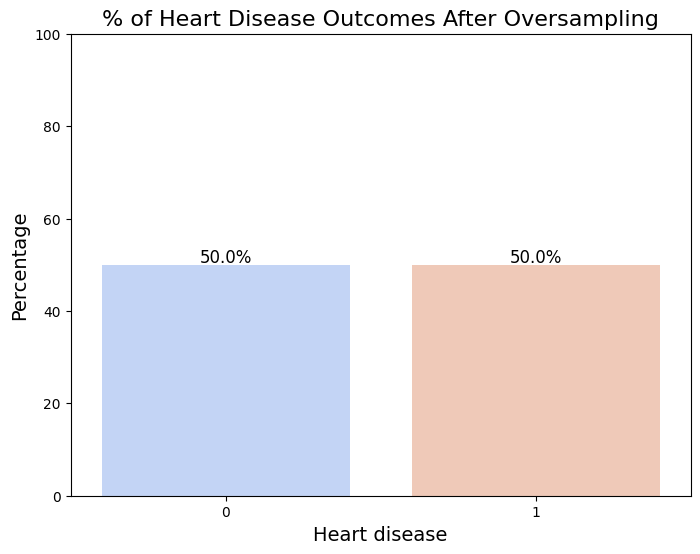

In [7]:
from imblearn.over_sampling import RandomOverSampler

# Using random_state = 10 to shuffle data before splitting
X, y = RandomOverSampler(random_state=10).fit_resample(X, y)

# Counting nb of heart disease
hd_counts = y.value_counts()
print(hd_counts)

# Calculating % of heart disease cases from dataset
total_samples = len(y)
percent_y = ( hd_counts[1] / total_samples) * 100
percent_n = (hd_counts[0] / total_samples) * 100

fig, ax = plt.subplots(figsize=(8, 6))

# Using Seaborn ( library in matplotlib ) to create the bar plot
sns.barplot(x=[1, 0], y=[percent_y, percent_n], alpha=0.8, palette="coolwarm")

# Setting plot title and labels
plt.title('% of Heart Disease Outcomes After Oversampling', fontsize=16)
plt.xlabel('Heart disease', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.ylim(0, 100)

# Add %'s to bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Display the plot
plt.show()

Now that the numer of classes is balanced, we ensured that the models we're going to build are not going to be biased towards any class.

### Checking correlation between dataset features

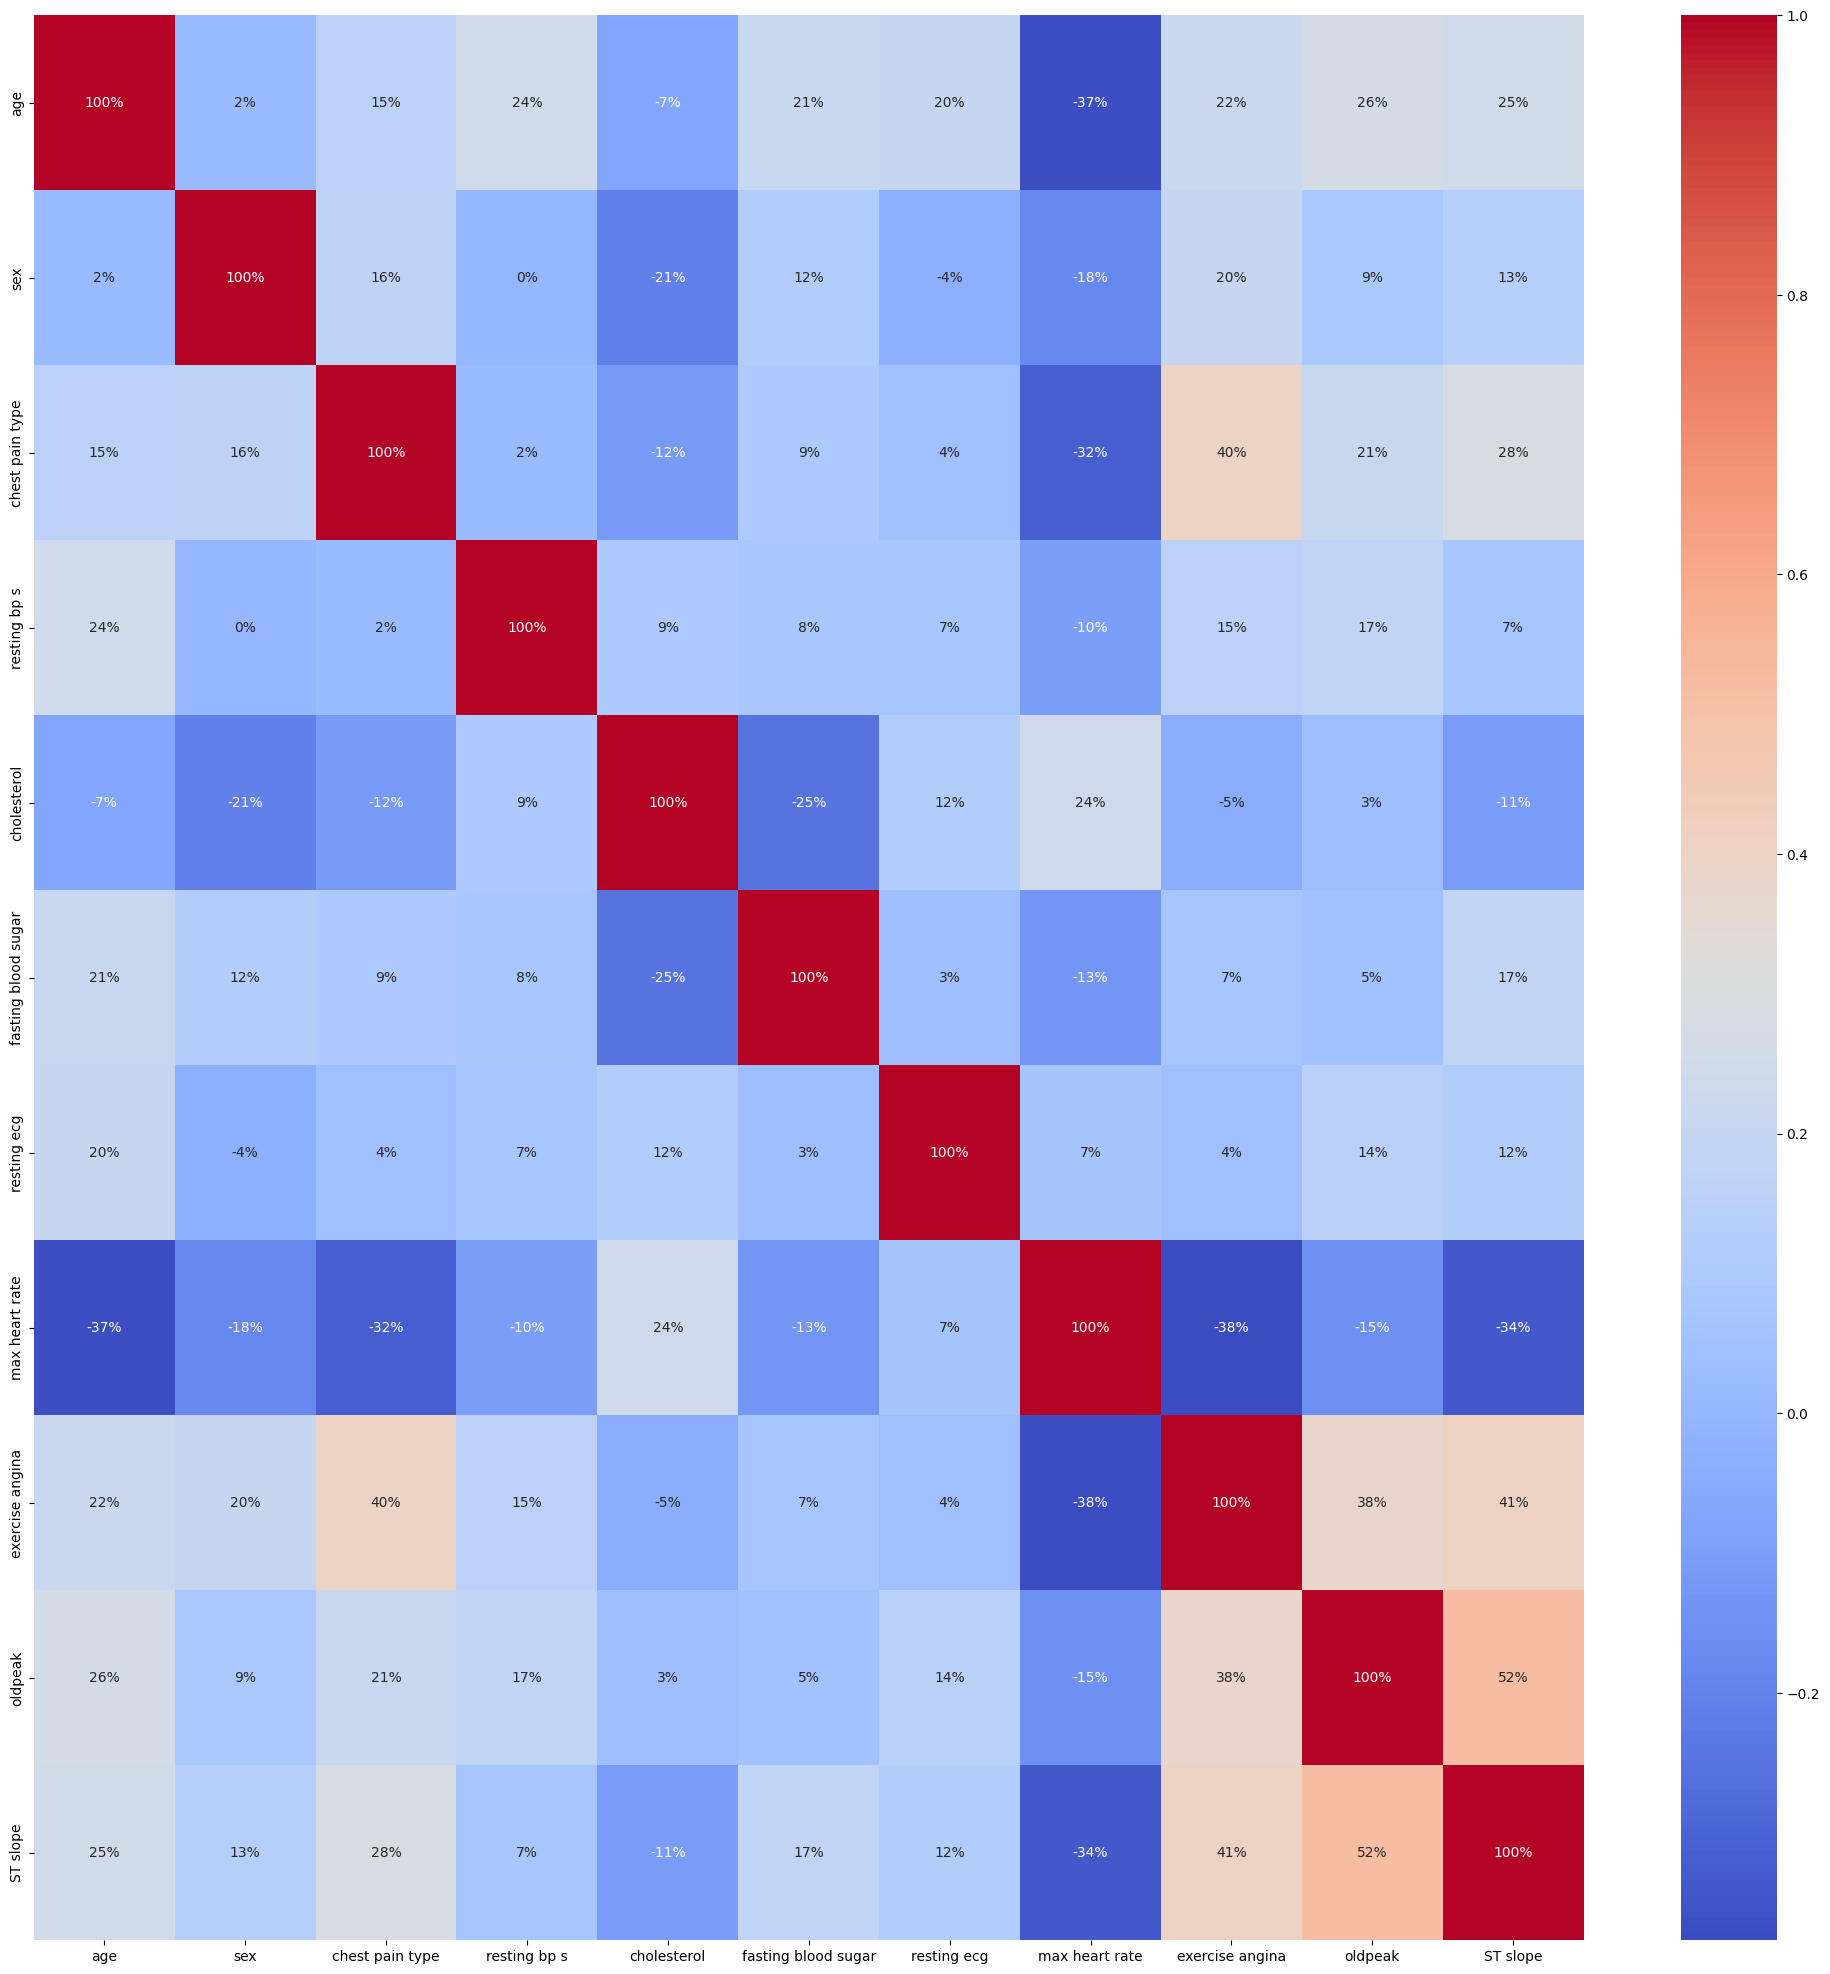

In [8]:
# Getting the correlation between columns
correlation_matrix = X.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, fmt='.0%' , cmap='coolwarm')
plt.show()


# (3) Data Preprocessing

## Dividing data into training and testing

In [9]:
from sklearn.model_selection import train_test_split

# We ensure heart disease proportion is preserved in both testing and training by stratify = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=54)

print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)
print("y train shape: ", y_train.shape)
print("y test shape: ",y_test.shape)

X train shape:  (864, 11)
X test shape:  (216, 11)
y train shape:  (864,)
y test shape:  (216,)


## Scaling / Normalization

We are using StandardScaler to standardize the data by giving the features a mean of 0 and s.d of 1. This is vital for the algorithms we used to perform well as they rely on feature scaling to perform optimally.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Feature Selection using PCA

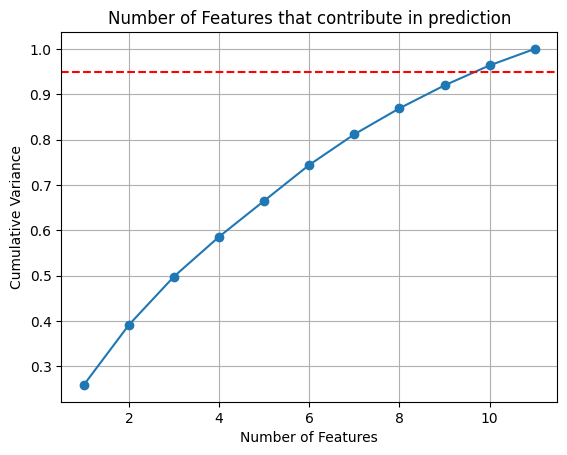

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(X_train_scaled)

xp = np.arange(1, len(pca.explained_variance_ratio_) + 1, step=1)
yp = np.cumsum(pca.explained_variance_ratio_)

# Plot
plt.plot(range(1, len(yp) + 1), yp, marker='o')
plt.axhline(0.95, color='r', linestyle='--')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Variance')
plt.title('Number of Features that contribute in prediction')
plt.grid(True)
plt.show()

Based on the plot, we can deduce that 9 features are required to reach the 95% predictive power.

In [20]:
n_features = 9  # value deduced from the plot
pca = PCA(n_features)

# Reduce datasets to top features
X_train_top = pca.fit_transform(X_train_scaled)
X_test_top = pca.transform(X_test_scaled)

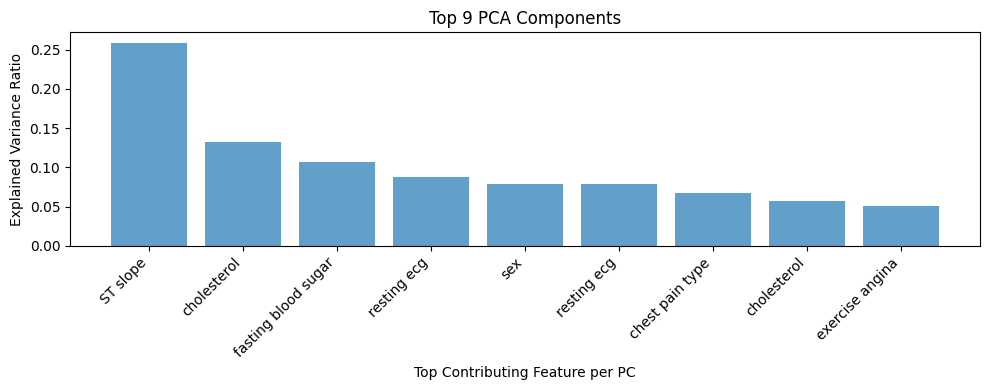

In [22]:
# Get the most important feature for each component
feature_names = X_train.columns
top_features = [
    feature_names[np.argmax(np.abs(pca.components_[i]))]
    for i in range(n_features)
]

# Plot
plt.figure(figsize=(10, 4))
plt.bar(
    range(1, n_features + 1),
    pca.explained_variance_ratio_,
    tick_label=top_features,
    alpha=0.7
)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Top Contributing Feature per PC')
plt.ylabel('Explained Variance Ratio')
plt.title(f'Top {n_features} PCA Components')
plt.tight_layout()
plt.show()

The features are arranged in order of importance, with the most significant ones holding the most information. It basically tells us the variability in our data per principal component. As we can see ST slope is the most important since it explains the most differences.

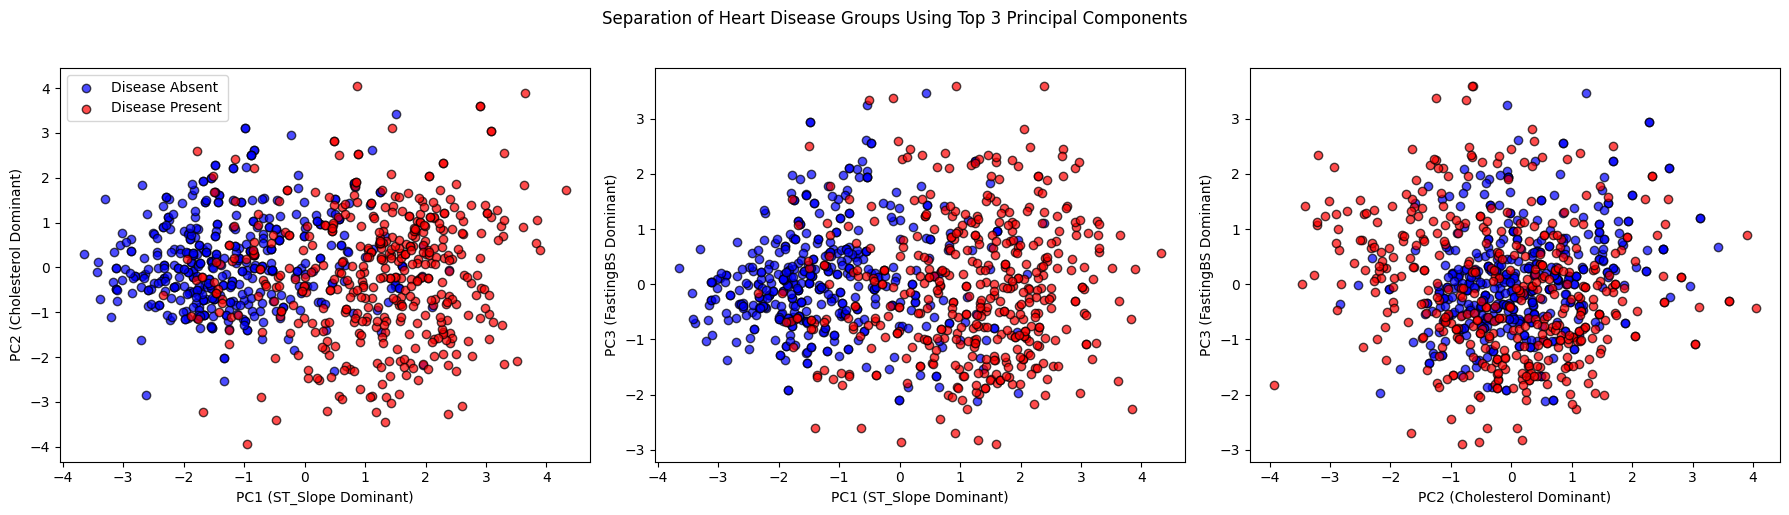

In [26]:
# Extract first 3 principal components
pc1 = X_train_top[:, 0]
pc2 = X_train_top[:, 1]
pc3 = X_train_top[:, 2]

# Create figure with 3 views
plt.figure(figsize=(18, 5))

# PC1 vs PC2 (ST slope vs Cholesterol)
plt.subplot(1, 3, 1)
plt.scatter(pc1[y_train==0], pc2[y_train==0], c='blue', label='Disease Absent', edgecolor='k', alpha=0.7)
plt.scatter(pc1[y_train==1], pc2[y_train==1], c='red', label='Disease Present', edgecolor='k', alpha=0.7)
plt.xlabel('PC1 (ST_Slope Dominant)')
plt.ylabel('PC2 (Cholesterol Dominant)')
plt.legend()

# PC1 vs PC3 (ST slope vs fasting blood sugar)
plt.subplot(1, 3, 2)
plt.scatter(pc1[y_train==0], pc3[y_train==0], c='blue', edgecolor='k', alpha=0.7)
plt.scatter(pc1[y_train==1], pc3[y_train==1], c='red', edgecolor='k', alpha=0.7)
plt.xlabel('PC1 (ST_Slope Dominant)')
plt.ylabel('PC3 (FastingBS Dominant)')

# PC2 vs PC3 (Cholesterol vs fasting blood sugar)
plt.subplot(1, 3, 3)
plt.scatter(pc2[y_train==0], pc3[y_train==0], c='blue', edgecolor='k', alpha=0.7)
plt.scatter(pc2[y_train==1], pc3[y_train==1], c='red', edgecolor='k', alpha=0.7)
plt.xlabel('PC2 (Cholesterol Dominant)')
plt.ylabel('PC3 (FastingBS Dominant)')

plt.suptitle('Separation of Heart Disease Groups Using Top 3 Principal Components', y=1.02)
plt.tight_layout()
plt.show()

From the scatter plots, we deduce that the model distinguishes presence of heart disease based on the 3 components chosen. It is evident in the first 2 that ST Slope has the most variance ratio and distinguishes correctly between presence and absence. We also see that each color is grouped alone.

# Step 4 and 5: Data Regularization and Model Selection

The most efficient models for binary classification are Logistic Regression, Random Forest, Support Vector Machine. We selected the result with highest accuracy after training with different models. We read the following article that helped us train the data with respective model: https://builtin.com/data-science/when-and-why-standardize-your-data

In [45]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

n_features=9
# Applying PCA with the 9 components
pca = PCA(n_features)

# Reduced datasets to top features as mentioned earlier
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Logistic Regression L1 & L2 with and without PCA

In [46]:
# L1 Regularization (Lasso)
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=54)
logreg_l1.fit(X_train_scaled, y_train)
y_pred_l1 = logreg_l1.predict(X_test_scaled)

# L1 Regularization (Lasso) with PCA
logreg_l1_pca = LogisticRegression(penalty='l1', solver='liblinear', random_state=54)
logreg_l1_pca.fit(X_train_pca, y_train)
y_pred_l1_pca = logreg_l1_pca.predict(X_test_pca)

# L2 Regularization (Ridge)
logreg_l2 = LogisticRegression(penalty='l2', random_state=54)
logreg_l2.fit(X_train_scaled, y_train)
y_pred_l2 = logreg_l2.predict(X_test_scaled)

# L2 Regularization (Ridge) with PCA
logreg_l2_pca = LogisticRegression(penalty='l2', random_state=54)
logreg_l2_pca.fit(X_train_pca, y_train)
y_pred_l2_pca = logreg_l2_pca.predict(X_test_pca)

# Random Forest and SVM with and without PCA

In [47]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Random Forest with PCA
rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_rf_pca = rf_pca.predict(X_test_pca)

# SVM
svm = SVC(kernel='rbf', random_state=54)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# SVM with PCA
svm_pca = SVC(kernel='rbf', random_state=54)
svm_pca.fit(X_train_pca, y_train)
y_pred_svm_pca = svm_pca.predict(X_test_pca)


# Calculating accuracies and displaying results

In [48]:
# Calculate accuracies
acc_l1 = accuracy_score(y_test, y_pred_l1)
acc_l1_pca = accuracy_score(y_test, y_pred_l1_pca)

acc_l2 = accuracy_score(y_test, y_pred_l2)
acc_l2_pca = accuracy_score(y_test, y_pred_l2_pca)

acc_rf = accuracy_score(y_test, y_pred_rf)
acc_rf_pca = accuracy_score(y_test, y_pred_rf_pca)

acc_svm = accuracy_score(y_test, y_pred_svm)
acc_svm_pca = accuracy_score(y_test, y_pred_svm_pca)

# Create comparison table
accuracy_df = pd.DataFrame({
    'Model': ['LogReg L1', 'LogReg L1 w PCA', 'LogReg L2', 'LogReg L2 w PCA',
              'Random Forest', 'Random Forest w PCA', 'SVM', 'SVM w PCA',],
    'Accuracy': [acc_l1, acc_l1_pca, acc_l2, acc_l2_pca, acc_rf, acc_rf_pca,
                 acc_svm, acc_svm_pca]
})

print("Accuracy Comparison:")
print(accuracy_df.to_markdown(index=False))

Accuracy Comparison:
| Model               |   Accuracy |
|:--------------------|-----------:|
| LogReg L1           |   0.800926 |
| LogReg L1 w PCA     |   0.796296 |
| LogReg L2           |   0.800926 |
| LogReg L2 w PCA     |   0.796296 |
| Random Forest       |   0.893519 |
| Random Forest w PCA |   0.898148 |
| SVM                 |   0.865741 |
| SVM w PCA           |   0.837963 |


# Hyperparameter Tuning on Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
# Define a reduced parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', None]
}


# Instantiate the Random Forest classifier
rf_model = RandomForestClassifier(random_state=45)

# Instantiate GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)

# Fit the model to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_

# Get all hyperparameter combinations and their respective scores
rf_results = pd.DataFrame(grid_search_rf.cv_results_)

# Extract relevant columns from the results
rf_results = rf_results[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_features', 'mean_test_score']]
rf_results = rf_results.sort_values(by='mean_test_score', ascending=False)

# Display the results in a table
print("\nBest Hyperparameters for Random Forest:", best_params_rf)

print("Hyperparameter Tuning Results for Random Forest:")
print(rf_results)



Best Hyperparameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Hyperparameter Tuning Results for Random Forest:
    param_n_estimators param_max_depth  param_min_samples_split  \
0                   50            None                        2   
48                  50              20                        2   
50                 150              20                        2   
2                  150            None                        2   
29                 150              10                        5   
..                 ...             ...                      ...   
44                 150              10                        2   
18                  50            None                        2   
66                  50              20                        2   
40                 100              10                        5   
42                  50              10                        

# Hyperparameter tuning on SVM

In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],            # Regularization strength
    'kernel': ['linear', 'rbf'],   # Kernel type
    'gamma': ['scale', 'auto']     # Kernel coefficient
}

# Instantiate the SVM classifier
svm_model = SVC(random_state=45)

# Instantiate GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5)

# Fit the model to the SCALED training data (SVM requires scaling)
grid_search_svm.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_svm = grid_search_svm.best_params_

# Get all hyperparameter combinations and their scores
svm_results = pd.DataFrame(grid_search_svm.cv_results_)

# Extract relevant columns
svm_results = svm_results[['param_C', 'param_kernel', 'param_gamma', 'mean_test_score']]
svm_results = svm_results.sort_values(by='mean_test_score', ascending=False)

# Display results
print("\nBest Hyperparameters for SVM:", best_params_svm)
print("\nHyperparameter Tuning Results for SVM:")
print(svm_results)


Best Hyperparameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Hyperparameter Tuning Results for SVM:
    param_C param_kernel param_gamma  mean_test_score
7       1.0          rbf        auto         0.878445
5       1.0          rbf       scale         0.878445
11     10.0          rbf        auto         0.864565
9      10.0          rbf       scale         0.863409
3       0.1          rbf        auto         0.855317
1       0.1          rbf       scale         0.855317
2       0.1       linear        auto         0.844905
0       0.1       linear       scale         0.844905
6       1.0       linear        auto         0.844899
4       1.0       linear       scale         0.844899
8      10.0       linear       scale         0.844899
10     10.0       linear        auto         0.844899


# Compare the Models

In [62]:
best_rf_mts = grid_search_rf.best_score_
best_svm_mts = grid_search_svm.best_score_

best_rf_df = pd.DataFrame({
    'Model': ['Random Forest w PCA'],
    'Mean Test Score': [best_rf_mts]
})

best_svm_df = pd.DataFrame({
    'Model': ['SVM'],
    'Mean Test Score': [best_svm_mts]
})

# Concatenate the DataFrames
comparison_df = pd.concat([best_rf_df, best_svm_df], ignore_index=True)

# Display the comparison DataFrame
print("Model Comparison:")
print(comparison_df)

Model Comparison:
                 Model  Mean Test Score
0  Random Forest w PCA         0.902803
1                  SVM         0.878445


After testing, it is evident that Random Forest with PCA performs better than SVM.

#  Model Evaluation

Lets visualize using confusion matrix

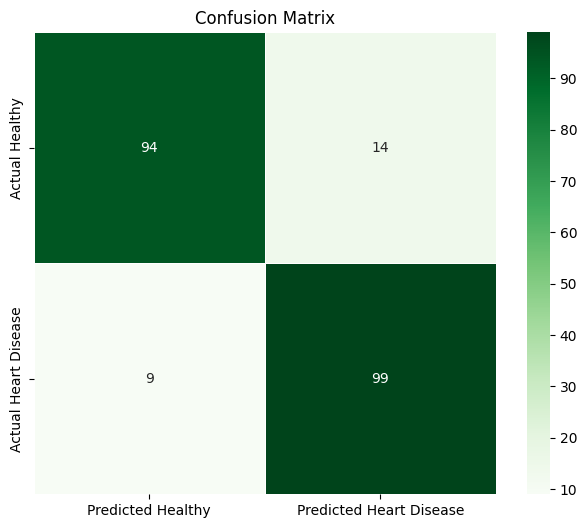

In [61]:
final_model = RandomForestClassifier(**best_params_rf)
final_model.fit(X_train_pca, y_train)
final_y_predicted = final_model.predict(X_test_pca)
final_accuracy = accuracy_score(y_test, final_y_predicted)

# Confusion Matrix
cm = confusion_matrix(y_test, final_y_predicted)

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', linewidths=.5, square=True,
            xticklabels=['Predicted Healthy', 'Predicted Heart Disease'],
            yticklabels=['Actual Healthy', 'Actual Heart Disease'])

plt.title('Confusion Matrix')
plt.show()

# Visualizing using precision-recall curve

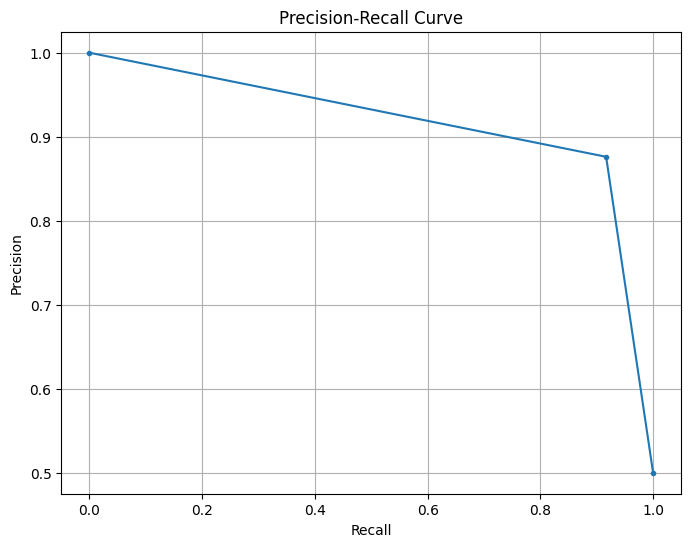

        Name                           Value
0  Precision  [0.5, 0.8761061946902655, 1.0]
1     Recall  [1.0, 0.9166666666666666, 0.0]
2   F1 Score                        0.895928
3   Accuracy                        0.893519


In [64]:
precision = precision_score(y_test, final_y_predicted)
recall = recall_score(y_test, final_y_predicted)
accuracy = accuracy_score(y_test, final_y_predicted)
f1 = f1_score(y_test, final_y_predicted)

# Calculate precision and recall values at various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, final_y_predicted)
# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

results = {
    'Name': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Value': [precision, recall, f1, accuracy]
}
# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results)
print(results_df)

The graph suggests that the model works best with moderate threshold. At lower thresholds, recall is 100% and precision is at 50% means 50% of disease predictions are wrong.

# Conclusion

After checking for class imbalance, null values and oversampled the data set for better testing, we regularized the data and worked with multiple models such as Logistic Regression, Random Forest and SVM.

We incorporated PCA and Hyperparameter tuning to check if these can increase the model's accuracy.

**Findings:**

- PCA revealed ST_Slope , Cholesterol and Fasting Bs as dominant predictors
- Random Forest performed better with PCA achieving 90% accuracy
- SVM performed better without PCA

**Future improvements:**

- Trying different models
- Improve Hyperparameter tuning (maybe using random search)
